In [22]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
# this is to display the columns
pd.options.display.max_columns = 100


#### Read the csv using PD

In [23]:
path = kagglehub.dataset_download("gcreatives/impact-of-covid-19-on-working-professionals")

print("Path to dataset files:", path)

df = pd.read_csv(path+'/synthetic_covid_impact_on_work.csv')
print(df.head())

#Displays the number of rows and columns
df.shape

Path to dataset files: /Users/shashankverma/.cache/kagglehub/datasets/gcreatives/impact-of-covid-19-on-working-professionals/versions/1
   Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
0                     1               1              6.392394   
1                     1               1              9.171984   
2                     1               0             10.612561   
3                     1               1              5.546169   
4                     0               1             11.424615   

   Meetings_Per_Day  Productivity_Change Stress_Level  Health_Issue  \
0          2.684594                    1          Low             0   
1          3.339225                    1          Low             0   
2          2.218333                    0       Medium             0   
3          5.150566                    0       Medium             0   
4          3.121126                    1       Medium             0   

   Job_Security  Childcare_Responsibilities  C

(10000, 15)

#### Rename the column

In [24]:
print(df.columns)

df.rename(columns={'Team_Collaboration_Challenges': 'Challenges_Team_Collaboration'}, inplace=True)

print(df.columns)

#shows the types of the columns
df.dtypes

df.describe



Index(['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day',
       'Meetings_Per_Day', 'Productivity_Change', 'Stress_Level',
       'Health_Issue', 'Job_Security', 'Childcare_Responsibilities',
       'Commuting_Changes', 'Technology_Adaptation', 'Salary_Changes',
       'Team_Collaboration_Challenges', 'Sector', 'Affected_by_Covid'],
      dtype='object')
Index(['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day',
       'Meetings_Per_Day', 'Productivity_Change', 'Stress_Level',
       'Health_Issue', 'Job_Security', 'Childcare_Responsibilities',
       'Commuting_Changes', 'Technology_Adaptation', 'Salary_Changes',
       'Challenges_Team_Collaboration', 'Sector', 'Affected_by_Covid'],
      dtype='object')


<bound method NDFrame.describe of       Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
0                        1               1              6.392394   
1                        1               1              9.171984   
2                        1               0             10.612561   
3                        1               1              5.546169   
4                        0               1             11.424615   
...                    ...             ...                   ...   
9995                     1               1              7.961822   
9996                     0               0             10.917086   
9997                     1               1             10.176211   
9998                     1               1             11.903973   
9999                     0               0              8.443284   

      Meetings_Per_Day  Productivity_Change Stress_Level  Health_Issue  \
0             2.684594                    1          Low             0   
1

#### Figure out Sectors Affected by COVID

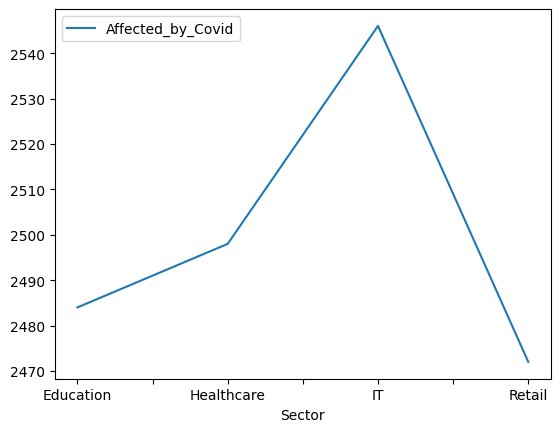

In [25]:
df_sector = df[['Sector', 'Affected_by_Covid']].groupby(['Sector']).sum()
df_sector.reset_index().plot(x='Sector', y='Affected_by_Covid')
plt.show()

#### How to sort the dataframe by ascending or descending based on a column

In [26]:
df_sector.sort_values(by=['Affected_by_Covid'], ascending=False)

,Affected_by_Covid
Sector,
IT,2546
Healthcare,2498
Education,2484
Retail,2472


#### How to drop duplicates from the dataframe

In [27]:
# Sample DataFrame
df1 = pd.DataFrame({
    'customer_id': [1, 2, 3, 2],
    'purchase_amount': [200, 150, 300, 150]
})

df1.head()
# Failing to mention inplace condition, will not change the df
df1.drop_duplicates(inplace=True)

df1.head()


,customer_id,purchase_amount
0,1,200
1,2,150
2,3,300


Index(['Sector', 'Affected_by_Covid'], dtype='object')


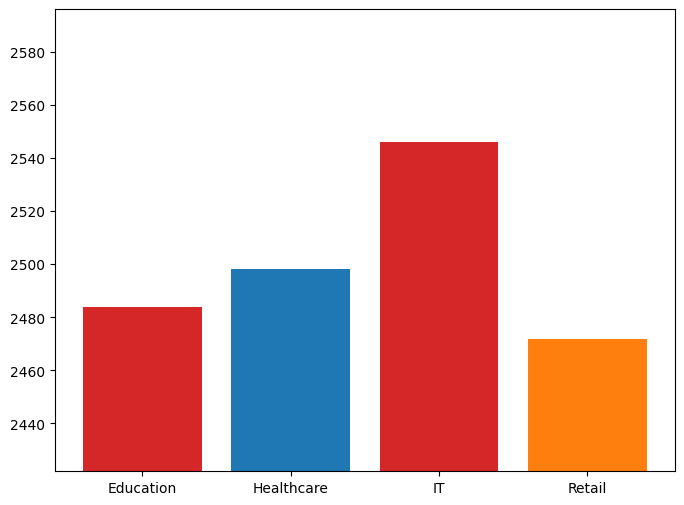

In [28]:
df_sector.reset_index(inplace=True)
print(df_sector.columns)
plt.figure(figsize=(8, 6))
plt.bar(df_sector.Sector, df_sector.Affected_by_Covid, color=['tab:red', 'tab:blue', 'tab:red', 'tab:orange'])
plt.ylim(df_sector['Affected_by_Covid'].min() - 50, df_sector['Affected_by_Covid'].max() + 50)
plt.show()


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           10000 non-null  int64  
 1   Work_From_Home                 10000 non-null  int64  
 2   Hours_Worked_Per_Day           10000 non-null  float64
 3   Meetings_Per_Day               10000 non-null  float64
 4   Productivity_Change            10000 non-null  int64  
 5   Stress_Level                   10000 non-null  object 
 6   Health_Issue                   10000 non-null  int64  
 7   Job_Security                   10000 non-null  int64  
 8   Childcare_Responsibilities     10000 non-null  int64  
 9   Commuting_Changes              10000 non-null  int64  
 10  Technology_Adaptation          10000 non-null  int64  
 11  Salary_Changes                 10000 non-null  int64  
 12  Challenges_Team_Collaboration  10000 non-null  

In [30]:
df.describe()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Challenges_Team_Collaboration,Affected_by_Covid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0
mean,0.676900,0.803300,8.006538,3.976717,0.50220,0.301100,0.404900,0.396700,0.50220,0.605100,0.194800,0.700600,1.0
std,0.467684,0.397523,1.978468,1.521594,0.50002,0.458759,0.490897,0.489237,0.50002,0.488854,0.396066,0.458018,0.0
min,0.000000,0.000000,0.287249,-2.698406,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,6.648484,2.924896,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
50%,1.000000,1.000000,8.010864,3.981344,1.00000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.0
75%,1.000000,1.000000,9.348860,5.024619,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,16.958169,9.591750,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0


#### Analyzing stress level based on Sector

In [31]:
# Use Size instead of count to count grouped values

df_stress_sector = df[['Sector', 'Stress_Level']].groupby(['Sector', 'Stress_Level']).size().reset_index(name ='Count')


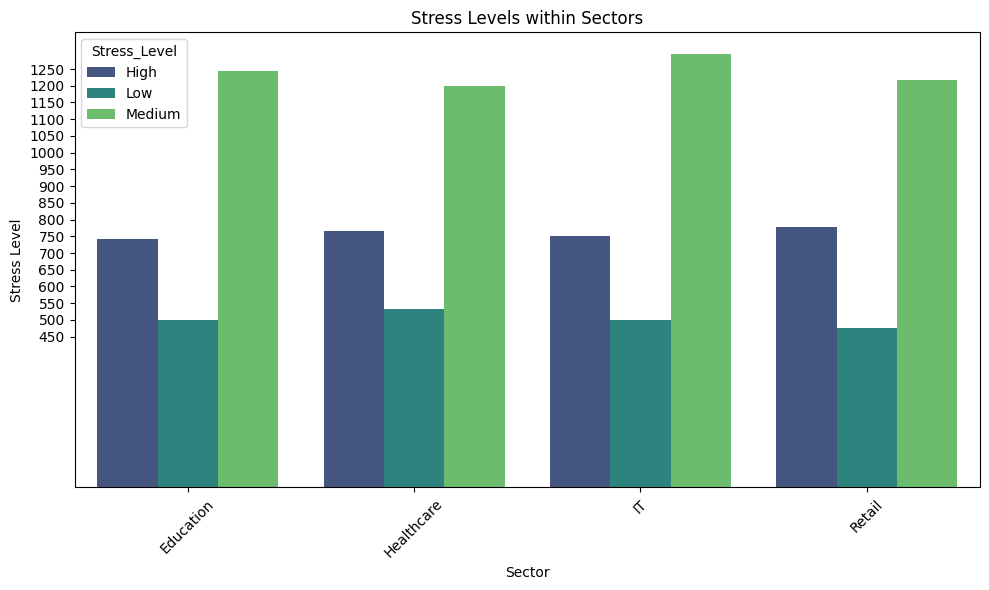

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import plotly.express as px

# Assuming df_stress_sector has columns 'Sector' and 'StressLevel'
plt.figure(figsize=(10, 6))
sns.barplot(x='Sector', y='Count', hue= 'Stress_Level', data=df_stress_sector, palette='viridis')
plt.xlabel('Sector')
plt.ylabel('Stress Level')
plt.title('Stress Levels within Sectors')
plt.xticks(rotation=45)
#plt.ylim(df_stress_sector['Count'].min() - 200, df_stress_sector['Count'].max() + 100)
plt.yticks(np.arange(450, 1300, 50))
plt.tight_layout()
plt.show()

#fig = px.bar(df, x="Category", y="Value", color="Group", barmode="stack")
#fig.show()

In [53]:
df_stress_sector.min()

Sector          Education
Stress_Level         High
Count                 477
dtype: object

In [46]:
#df_stress_sector = df_stress_sector.reset_index()
df_stress_sector.tail()

,Sector,Stress_Level,Count
7,IT,Low,500
8,IT,Medium,1295
9,Retail,High,777
10,Retail,Low,477
11,Retail,Medium,1218


In [209]:
#plt.scatter('Sector', 'Count', c='Stress_Level', data=df_stress_sector, cmap='coolwarm')

#plt.show()

In [210]:
# This results in a list with two items 6, 55
'6 55'.split()

['6', '55']

##### Create a dataframe on the fly like this based on conditions

In [211]:
def dataframe_return():
    return pd.DataFrame({
        f'getNthHighestSalary({N})': [None if (sorted_salaries.size < N or N < 0 or N ==0) else sorted_salaries.iloc[N-1]]})

#### Rank method in Pandas

You can implement ranking in pandas using the rank() function. The rank() method assigns ranks to each value in a DataFrame or Series based on their order. You can customize the ranking by using different methods such as:

- 'average': Assigns the average rank to the values that are tied.
- 'min': Assigns the smallest rank to the values that are tied.
- 'max': Assigns the largest rank to the values that are tied.
- 'first': Ranks values in the order they appear.
- 'dense': Like 'min', but ranks are always consecutive.

In [212]:
df['rank'] = df['Meetings_Per_Day'].rank(method='dense', ascending=False)